In [124]:
try:
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sb
    import plotly.express as px


    %matplotlib inline

    from collections import Counter
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.preprocessing import StandardScaler
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    print('Library Loaded .........')
except:
    print('One or More Library was not Found ! ')

Library Loaded .........


In [125]:
df = pd.read_csv("DataSets/diabetes_prediction_dataset.csv")

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [127]:
df.shape

(100000, 9)

* No nulls present inside dataset.

In [128]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [129]:
df.duplicated().sum()

3854

In [130]:
# removing duplicates :-
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

## Data Exploration :

In [131]:
# gender :
df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [132]:
# removing records with gender not defined "low number of records which will not affect the result"
df = df[df['gender']!='Other']

num_var = list(df['gender'].value_counts().values)
labels = list(df['gender'].value_counts().index)
count_dict = dict(enumerate(num_var))

print(num_var)
print(labels)

[56161, 39967]
['Female', 'Male']


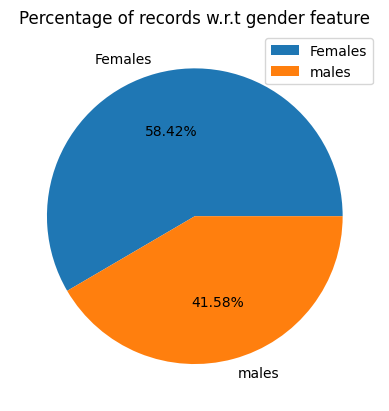

In [133]:
# Gender visualization
plt.pie(count_dict.values(), labels = ['Females', 'males'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of records w.r.t gender feature');

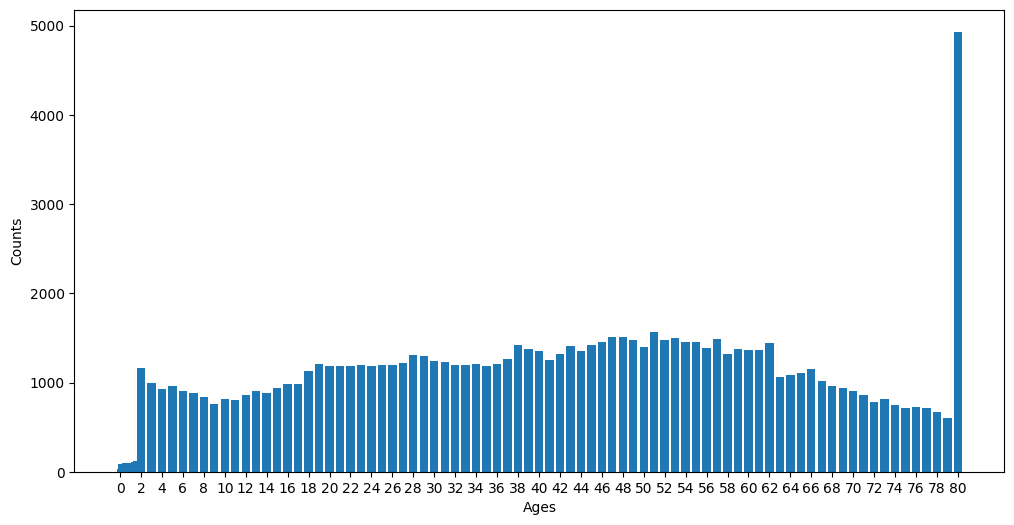

In [134]:
plt.figure(figsize=[12, 6])
age_counts = df['age'].value_counts().sort_index()
plt.bar(age_counts.index, age_counts.values)
plt.xlabel('Ages')
plt.ylabel('Counts')
plt.xticks(np.arange(0, 82, 2))
plt.show()

In [135]:
# hypertension :
df['hypertension'].value_counts()

0    88667
1     7461
Name: hypertension, dtype: int64

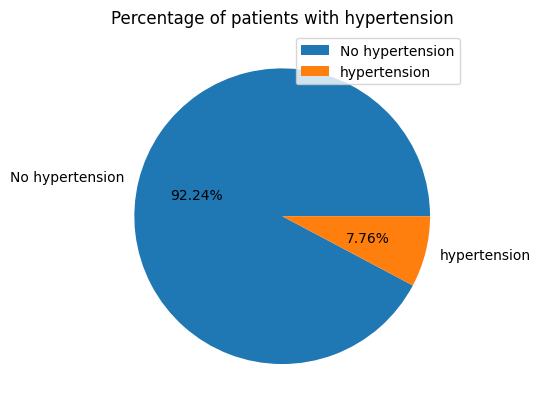

In [136]:
num_var = list(df['hypertension'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['No hypertension', 'hypertension'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with hypertension');

In [137]:
# heart_disease :
df['heart_disease'].value_counts()

0    92205
1     3923
Name: heart_disease, dtype: int64

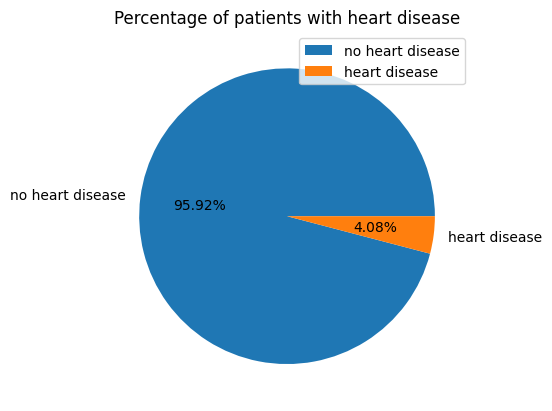

In [138]:
num_var = list(df['heart_disease'].value_counts().values)
count_dict = dict(enumerate(num_var))

# [0] return to 'no hypertension' and [1] return to 'hypertension'
plt.pie(count_dict.values(), labels = ['no heart disease', 'heart disease'],autopct='%1.2f%%');
plt.legend();
plt.title('Percentage of patients with heart disease');

In [139]:
# smoking_history :
df['smoking_history'].value_counts()

never          34395
No Info        32881
former          9299
current         9197
not current     6359
ever            3997
Name: smoking_history, dtype: int64

In [140]:
df[df['smoking_history'] == 'No Info'].shape[0] / df.shape[0] *100

34.2054344207723

* 34 % of records have **no info** about smoking history , it like to be big missing values so we will remove this column better to maintain data integrity 

In [141]:
# removing smoking_history column :
df = df.drop(columns = ['smoking_history'])

In [142]:
# Box plot
box_fig = px.box(df, x='bmi', width=700, height=400)

# Violin plot
violin_fig = px.violin(df, x='bmi', width=700, height=400)

# Display the plots
box_fig.show()
violin_fig.show()

In [143]:
# as we see we have many outliers from visualization, we want to remove it:
# 1. frist calculation IQR
IQR = df['bmi'].quantile(0.75) - df['bmi'].quantile(0.25)

# determine the upper and lower boundries : 
upper_boundry = df['bmi'].quantile(0.75) + (IQR*1.5)
lower_boundry = df['bmi'].quantile(0.25) - (IQR*1.5)

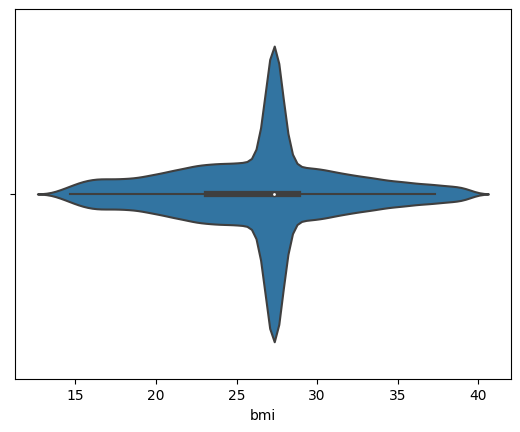

In [144]:
# removing outliers :
df = df[df['bmi'] <= upper_boundry]
df = df[df['bmi'] >= lower_boundry]

sb.violinplot(data = df, x = 'bmi');

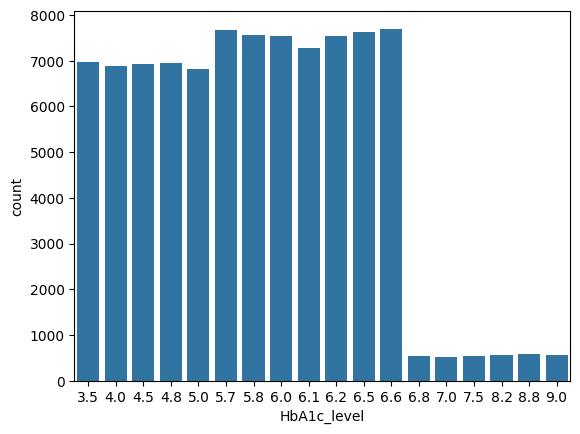

In [145]:
# HbA1c_level :
base_color = sb.color_palette()[0]
sb.countplot(data = df, x = df['HbA1c_level'], color = base_color);

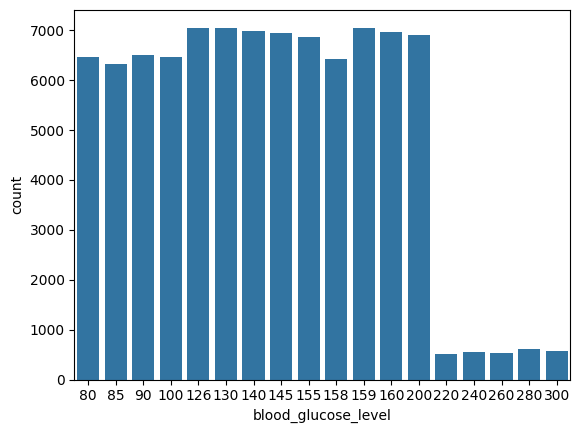

In [146]:
# blood_glucose_level :
sb.countplot(data = df, x = df['blood_glucose_level'], color = base_color);

In [147]:
# diabetes :-
labels = list(df['diabetes'].value_counts().index)
num_var = list(df['diabetes'].value_counts().values)
print(labels)
print(num_var)

[0, 1]
[83559, 7215]


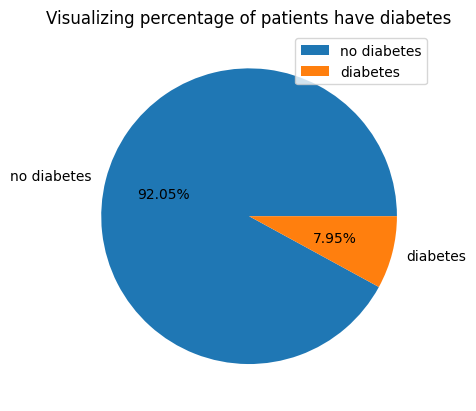

In [148]:
plt.pie(num_var, labels = ['no diabetes', 'diabetes'],autopct='%1.2f%%');
plt.legend();
plt.title('Visualizing percentage of patients have diabetes');

In [149]:
# reset index after removing some outliers and duplicates :-
df = df.reset_index(drop=True)


### 1. HbA1c_level vs. diabetes :-

<b>HbA1c_level </b>
- A hemoglobin A1C (HbA1C) test is a blood test that shows what your average blood sugar (glucose) level was over the past two to three months.

- we will create a new feature bassed on the value of (HbA1C)

| HbA1c level | initial diagnosis |
|------|------|
| < 5.7 | Normal|
| 5.7 – 6.4 | Prediabetes|
| >= 6.5 | Diabetes|

In [150]:
diagnosing = []
for value in df['HbA1c_level']:
    if value < 5.7:
        diagnosing.append('normal')
        
    elif (5.7 <= value) and (value <= 6.4):
        diagnosing.append('prediabetes')
        
    elif (value >= 6.5):
        diagnosing.append('diabetes')
        
df['initial_diagnosis'] = diagnosing

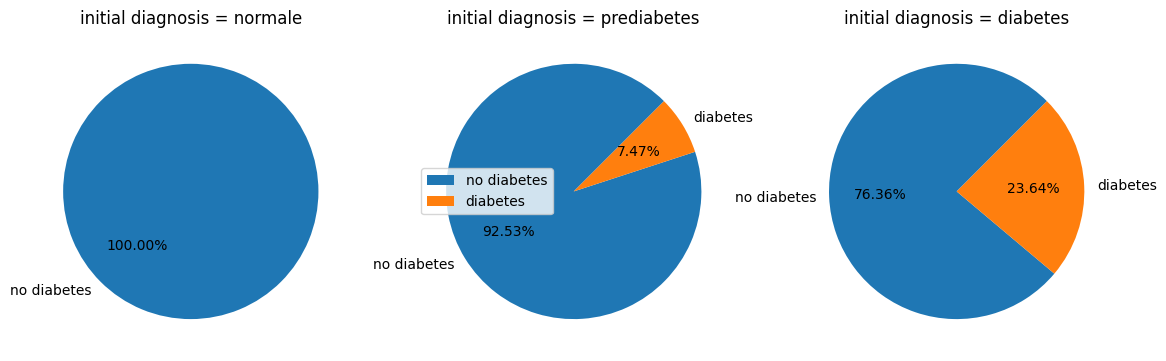

In [151]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['initial_diagnosis'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = normale');

plt.subplot(1,3,2);
plt.pie(df[df['initial_diagnosis'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('initial diagnosis = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['initial_diagnosis'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('initial diagnosis = diabetes');

* we can see that the value of **HbA1c_level** affect on the prediction whether it diabetes or not 
* when the value of **HbA1c_level**lies on normale value , we see that there is no records with diabetes
* as **HbA1c_level** value increases, number of records with diabetes increases ## specially when it >= 6.5 

| HbA1c level | initial diagnosis | actual diagnosis 
|------|------|------|
| < 5.7 | Normal| 100% no diabetes 
| 5.7 – 6.4 | Prediabetes| 7.47% have diabetes 
| >= 6.5 | Diabetes| 23.64% have diabetes 


### 2. bmi vs diabetes :- 

<b>BMI </b>
-  Body mass index is a measure of body fat based on height and weight that applies to adult men and women.
-  it is the weight in kilograms divided by height in meters squared

| BMI | Category |
|------|------|
| =< 18.5 | Underweight|
| 18.5 – 24.9 | Normal|
| 25 – 29.9 | Overweight|
| >= 30 | Obesity|

In [152]:
weight_type = []

for value in df['bmi']:
    if value <= 18.5:
        weight_type.append('underweight')
        
    elif (18.5 < value) and (value <= 24.9):
        weight_type.append('normal')
        
    elif (24.9 < value) and (value <= 29.9):
        weight_type.append('overweight')
        
    elif (value > 29.9):
        weight_type.append('obesity')
        
df['weight_type'] = weight_type

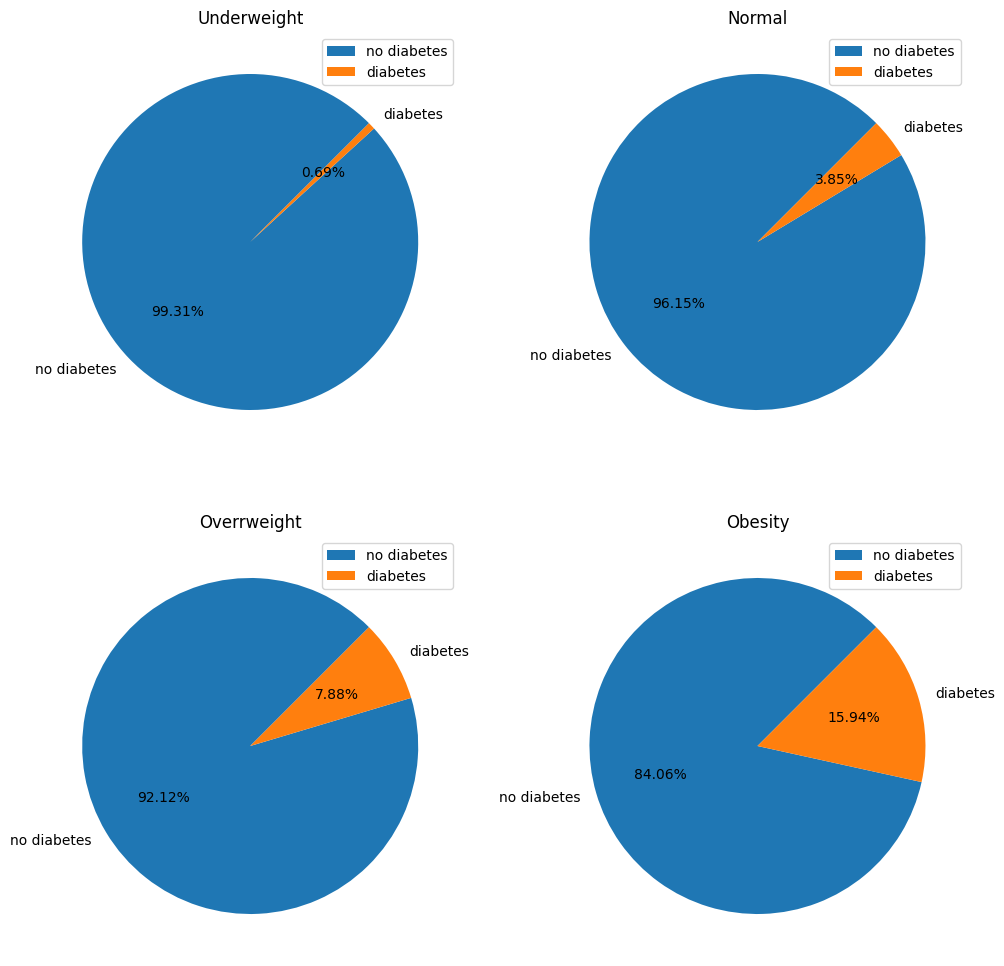

In [153]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [12,12]);

plt.subplot(2,2,1);
plt.pie(df[df['weight_type'] == 'underweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('Underweight')
plt.legend();

plt.subplot(2,2,2);
plt.pie(df[df['weight_type'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Normal')
plt.legend();

plt.subplot(2,2,3);
plt.pie(df[df['weight_type'] == 'overweight']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Overrweight')
plt.legend();

plt.subplot(2,2,4);
plt.pie(df[df['weight_type'] == 'obesity']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('Obesity')
plt.legend();

* according to ordinal category **['underweight','normal','overweight','obesity']**, as weight category increases, percentage of patients with diabetes increase.

| BMI | Category | Prediction
|------|------|------|
| =< 18.5 | Underweight| 0.7% have diabetes 
| 18.5 – 24.9 | Normal| 3.85% have diabetes
| 25 – 29.9 | Overweight| 7.88% have diabetes 
| >= 30 | Obesity| 15.94% have diabetes


### 3. blood_glucose_level vs diabetes :-

<b>blood_glucose_level </b>

| blood_glucose_level | Category |
|------|------|
| =< 99 | normal|
| 100 – 125| Prediabetes|
| >= 126 | Diabetes|

In [154]:
sugar_test = []

for value in df['blood_glucose_level']:
    if value <= 99:
        sugar_test.append('normal')
        
    elif (99 < value) and (value <= 125):
        sugar_test.append('prediabetes')
        
    elif (value > 125):
        sugar_test.append('diabetes')
        
df['sugar_test'] = sugar_test

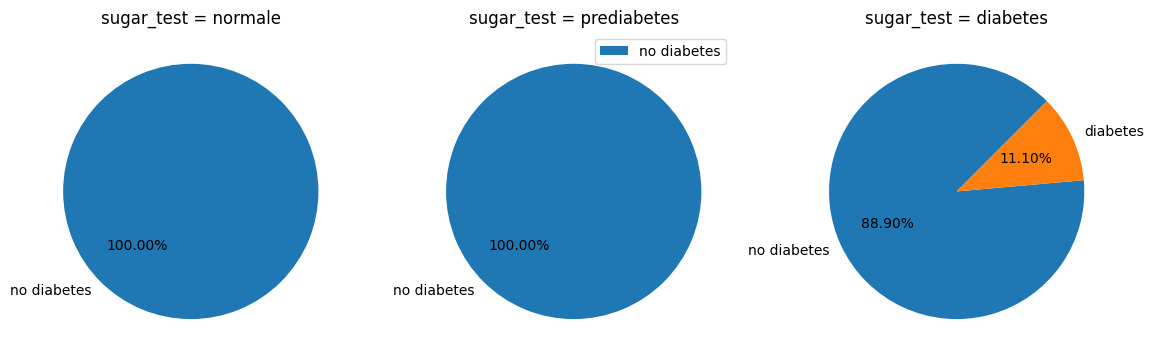

In [155]:
# drow pie chart for each ['weight_type']
plt.figure(figsize = [14,8]);

plt.subplot(1,3,1);
plt.pie(df[df['sugar_test'] == 'normal']['diabetes'].value_counts().values, labels = ['no diabetes'],
        autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = normale');

plt.subplot(1,3,2);
plt.pie(df[df['sugar_test'] == 'prediabetes']['diabetes'].value_counts().values, labels = ['no diabetes'],
       autopct='%1.2f%%',startangle = 45);
plt.title('sugar_test = prediabetes');
plt.legend();

plt.subplot(1,3,3);
plt.pie(df[df['sugar_test'] == 'diabetes']['diabetes'].value_counts().values, labels = ['no diabetes', 'diabetes'],
       autopct='%1.2f%%', startangle = 45);
plt.title('sugar_test = diabetes');

#### all patients with diabetes have high sugar test result ( > 126)

In [156]:
# deep exploration :....

# isolate record with 'blood_glucose_level' values >= 126.
high_sugar_result = df[df['blood_glucose_level'] >= 126]

# counts number of patients have diabetes.
counts  = pd.DataFrame(high_sugar_result.groupby(['blood_glucose_level'])['diabetes'].sum())

# create a columns with total number of patients and the percentage of them who have diabetes 
counts['total'] = high_sugar_result['blood_glucose_level'].value_counts().sort_index()
counts['percentage'] = round((counts['diabetes'] / counts['total'])*100,2)

counts = counts.reset_index()
counts

,blood_glucose_level,diabetes,total,percentage
0,126,540,7040,7.67
1,130,576,7041,8.18
2,140,533,6986,7.63
3,145,559,6952,8.04
4,155,496,6866,7.22
5,158,0,6423,0.00
6,159,564,7053,8.00
7,160,597,6972,8.56
8,200,558,6900,8.09
9,220,518,518,100.00


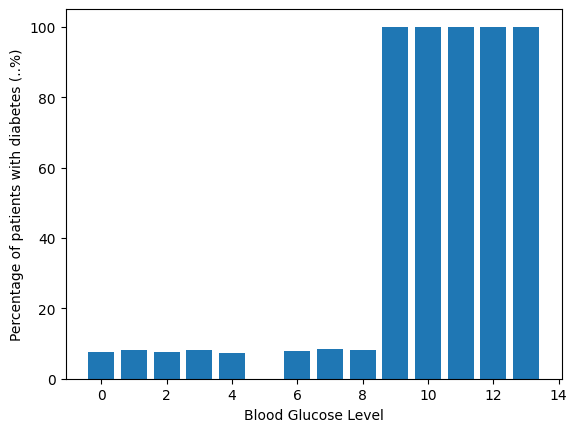

In [157]:
# barplot for visual representation :
plt.bar(counts.index, counts['percentage']);
plt.xlabel('Blood Glucose Level');
plt.ylabel('Percentage of patients with diabetes (..%)');

* Patients with **['blood_glucose_level']** between **126 to 200** , around 7.5 of them have already diabetes and that whose **['blood_glucose_level'] >= 220** , all of then have accually diabetes .

In [158]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90774 entries, 0 to 90773
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               90774 non-null  object 
 1   age                  90774 non-null  float64
 2   hypertension         90774 non-null  int64  
 3   heart_disease        90774 non-null  int64  
 4   bmi                  90774 non-null  float64
 5   HbA1c_level          90774 non-null  float64
 6   blood_glucose_level  90774 non-null  int64  
 7   diabetes             90774 non-null  int64  
 8   initial_diagnosis    90774 non-null  object 
 9   weight_type          90774 non-null  object 
 10  sugar_test           90774 non-null  object 
dtypes: float64(3), int64(4), object(4)
memory usage: 7.6+ MB


In [159]:
df.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,initial_diagnosis,weight_type,sugar_test
0,Female,80.0,0,1,25.19,6.6,140,0,diabetes,overweight,diabetes
1,Female,54.0,0,0,27.32,6.6,80,0,diabetes,overweight,normal
2,Male,28.0,0,0,27.32,5.7,158,0,prediabetes,overweight,diabetes
3,Female,36.0,0,0,23.45,5.0,155,0,normal,normal,diabetes
4,Male,76.0,1,1,20.14,4.8,155,0,normal,normal,diabetes


In [161]:
pd.unique(df.initial_diagnosis)

array(['diabetes', 'prediabetes', 'normal'], dtype=object)

In [162]:
pd.unique(df.weight_type)

array(['overweight', 'normal', 'obesity', 'underweight'], dtype=object)

In [163]:
pd.unique(df.sugar_test)

array(['diabetes', 'normal', 'prediabetes'], dtype=object)

In [165]:
df = pd.get_dummies(df)
pd.set_option('display.max_columns',500)
df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,initial_diagnosis_diabetes,initial_diagnosis_normal,initial_diagnosis_prediabetes,weight_type_normal,weight_type_obesity,weight_type_overweight,weight_type_underweight,sugar_test_diabetes,sugar_test_normal,sugar_test_prediabetes
0,80.0,0,1,25.19,6.6,140,0,1,0,1,0,0,0,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0,0,0,1,0,0,1,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,1,0,0,1,0,1,0,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,1,0,1,0,0,0,1,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,1,0,1,0,0,0,1,0,0


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90774 entries, 0 to 90773
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            90774 non-null  float64
 1   hypertension                   90774 non-null  int64  
 2   heart_disease                  90774 non-null  int64  
 3   bmi                            90774 non-null  float64
 4   HbA1c_level                    90774 non-null  float64
 5   blood_glucose_level            90774 non-null  int64  
 6   diabetes                       90774 non-null  int64  
 7   gender_Female                  90774 non-null  uint8  
 8   gender_Male                    90774 non-null  uint8  
 9   initial_diagnosis_diabetes     90774 non-null  uint8  
 10  initial_diagnosis_normal       90774 non-null  uint8  
 11  initial_diagnosis_prediabetes  90774 non-null  uint8  
 12  weight_type_normal             90774 non-null 